In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
#importing dataset
my_new_data = pd.read_csv("Car-details-v3.csv")
print(my_new_data.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2       Honda City 20172020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner  mileage  engine max_power         torque  \
0  Individual       Manual      1    23.40    1248        74       190-2000   
1  Individual       Manual      2    21.14    1498    103.52   250-15002500   
2  Individual       Manual      3    17.70    1497        78     12.7-2.700   
3  Individual       Manual      1    23.00    1396        90  22.4-17502750   
4  Individual       Manual      1    16.10    1298      88.2     11.5-4.500   

   ses  
0  5.0  
1  5.0  
2  5.0  
3  5.0  
4  5.0  


In [3]:
#setting target
#selecting features
target_price = my_new_data["selling_price"]
print(target_price)
year = my_new_data['year']
engine = my_new_data['engine']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


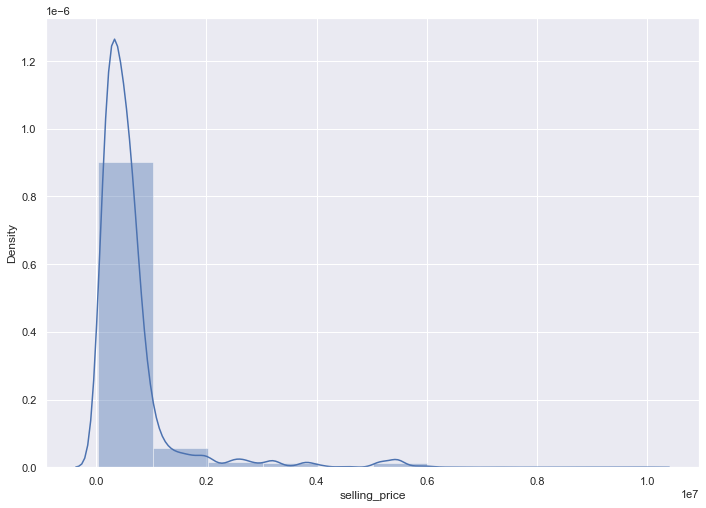

In [4]:
#histogram plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(my_new_data['selling_price'], bins=10)
plt.show()

               year  selling_price  km_driven  owner  mileage  engine   ses
year           1.00           0.41      -0.42  -0.50     0.33    0.13 -0.01
selling_price  0.41           1.00      -0.23  -0.22    -0.13    0.45  0.04
km_driven     -0.42          -0.23       1.00   0.28    -0.17    0.16  0.23
owner         -0.50          -0.22       0.28   1.00    -0.18   -0.05  0.03
mileage        0.33          -0.13      -0.17  -0.18     1.00   -0.58 -0.45
engine         0.13           0.45       0.16  -0.05    -0.58    1.00  0.61
ses           -0.01           0.04       0.23   0.03    -0.45    0.61  1.00


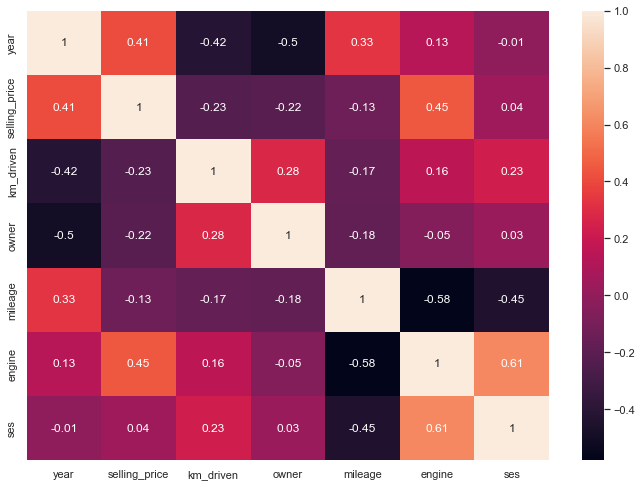

In [5]:
#correlation plotting
correlation_matrix = my_new_data.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [6]:
# X and y datatypes
X = pd.DataFrame(np.c_[my_new_data['year'], my_new_data['engine']], columns = ['year','engine'])
y = my_new_data['selling_price']
print(X)
print(X.dtypes)
print(y.dtypes)

      year  engine
0     2014    1248
1     2014    1498
2     2006    1497
3     2010    1396
4     2007    1298
...    ...     ...
8123  2013    1197
8124  2007    1493
8125  2009    1248
8126  2013    1396
8127  2013    1396

[8128 rows x 2 columns]
year      int64
engine    int64
dtype: object
int64


In [7]:
#splitting test and train
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6502, 2)
(1626, 2)
(6502,)
(1626,)


In [8]:
# fitting in model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [9]:
# r2score and RMSE
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 671633.9897169747
R2 score is 0.32618964921774785


The model performance for testing set
--------------------------------------
RMSE is 379644926369.1753
R2 score is 0.3361516059800419


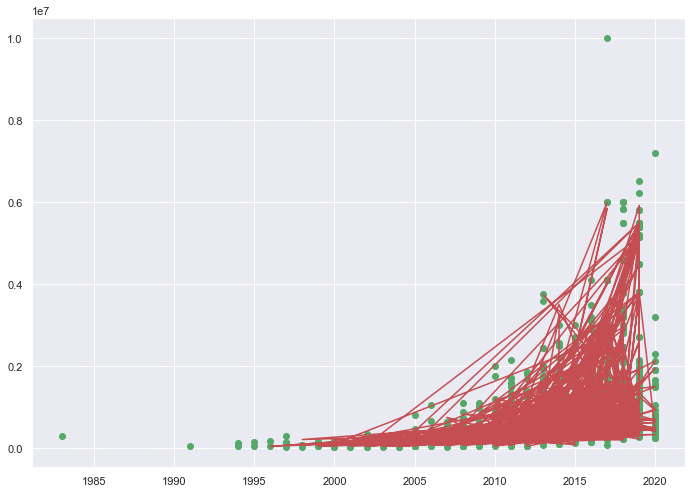

In [10]:
#plot to see
plt.scatter(X_train['year'], Y_train,color='g') 
plt.plot(X_test['year'],Y_test, color="r")
# plt.scatter(X_train['engine'], Y_train,color='b') 
# plt.plot(X_train['year'], y_train_predict,color='k') 
plt.show()

In [11]:
# plt.plot(X_test['year'],Y_test)
# # plt.scatter(X_test['engine'],y_test_predict)
# plt.show()

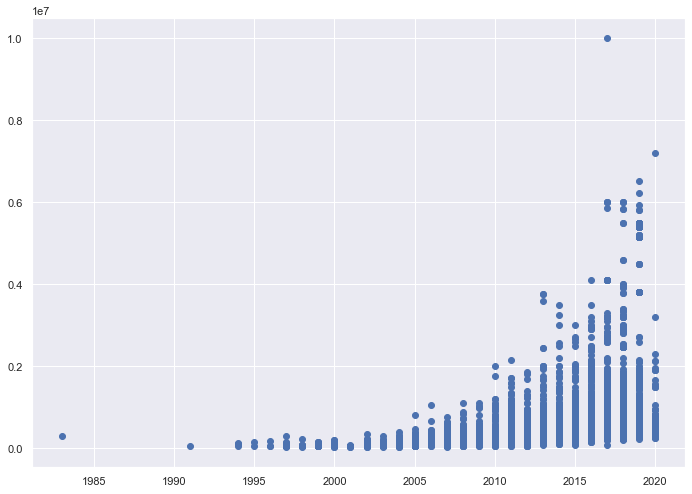

In [12]:
plt.scatter(year, target_price)
# plt.scatter(engine, target_price)
plt.show()